/home/suyamoon/data/miniconda3/envs/argmining/lib/python3.12/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.stats import gaussian_kde


Classification Report:
              precision    recall  f1-score   support

      attack       0.09      0.95      0.17        63
 no-relation       0.78      0.42      0.54       592
     support       0.61      0.14      0.23       392

    accuracy                           0.35      1047
   macro avg       0.49      0.50      0.32      1047
weighted avg       0.67      0.35      0.40      1047



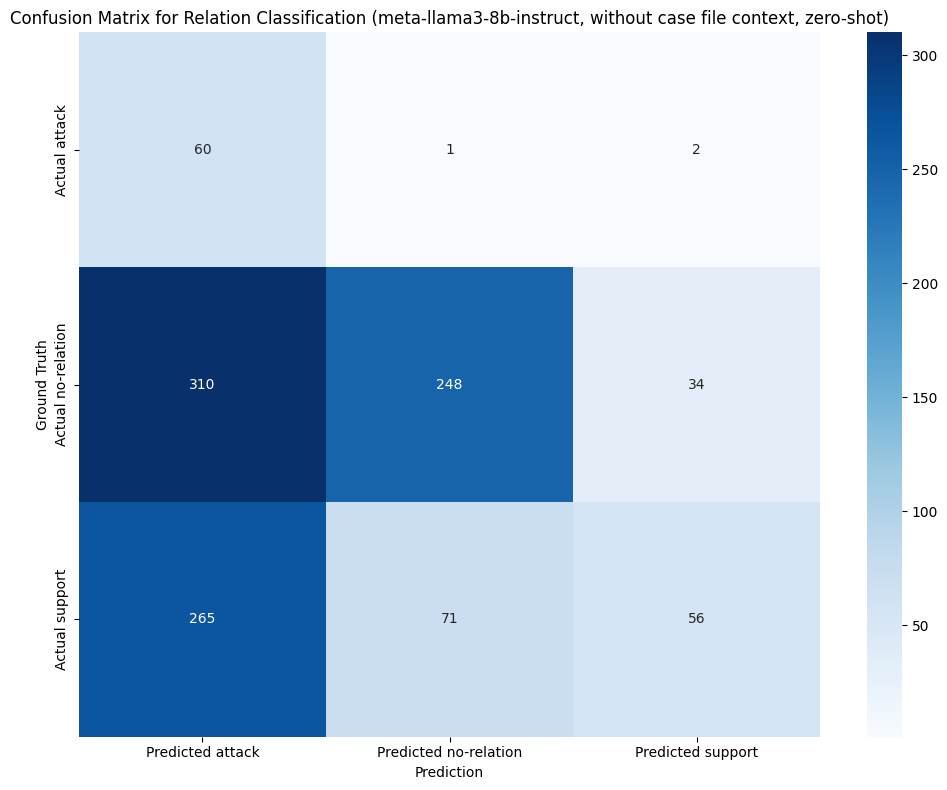


Confusion Matrix:
                    Predicted attack  Predicted no-relation  Predicted support
Actual attack                     60                      1                  2
Actual no-relation               310                    248                 34
Actual support                   265                     71                 56


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

# Load the CSV file
file_path = 'predictions/filtered_relations_test_clean_removed_conclusion_source_predictions.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Extract actual and predicted relations
actual_relations = data['actual_relation']
predicted_relations = data['predicted_relation']

# Define the relation types
relation_types = ["attack", "no-relation", "support" ]

def save_classification_report(predictions, labels, output_dir="./"):
    report = classification_report(
        labels, predictions,
        target_names=relation_types
    )
    
    with open(f"{output_dir}/classification_report.txt", "w") as f:
        f.write(report)
    
    print("Classification Report:")
    print(report)

def plot_confusion_matrix(y_true, y_pred, output_path="confusion_matrix.png"):
    cm = confusion_matrix(y_true, y_pred, labels=relation_types)
    
    # Create labels for each cell showing count
    labels = np.empty_like(cm, dtype=object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            labels[i, j] = f"{cm[i, j]}"
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=labels, fmt='', cmap="Blues",
                xticklabels=[f"Predicted {rel}" for rel in relation_types],
                yticklabels=[f"Actual {rel}" for rel in relation_types])
    plt.xlabel('Prediction')
    plt.ylabel('Ground Truth')
    plt.title('Confusion Matrix for Relation Classification (meta-llama3-8b-instruct, without case file context, zero-shot)')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

# Generate classification report and confusion matrix
save_classification_report(predicted_relations, actual_relations)
plot_confusion_matrix(actual_relations, predicted_relations)

# Display the confusion matrix as a DataFrame for better readability
cm_df = pd.DataFrame(
    confusion_matrix(actual_relations, predicted_relations, labels=relation_types),
    index=[f"Actual {rel}" for rel in relation_types],
    columns=[f"Predicted {rel}" for rel in relation_types]
)

print("\nConfusion Matrix:")
print(cm_df)
